# Setup

In [101]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import itertools as it

%matplotlib inline

# Neurons as Logic Gates

As an introduction to neural networks and their component neurons, we are going to look at using neurons to implement the most primitive logic computations:  logic gates.  Let's go!

##### The Sigmoid Function

The basic, classic activation function that we apply to neurons is a  sigmoid (sometimes just called *the* sigmoid function) function:  the standard logistic function.

$$
\sigma = \frac{1}{1 + e^{-x}}
$$

$\sigma$ ranges from (0, 1). When the input $x$ is negative, $\sigma$ is close to 0. When $x$ is positive, $\sigma$ is close to 1. At $x=0$, $\sigma=0.5$

We can implement this conveniently with NumPy.

In [102]:
def sigmoid(x):
    """Sigmoid function"""
    return 1.0 / (1.0 + np.exp(-x))

And plot it with matplotlib.

(-0.1, 1.15)

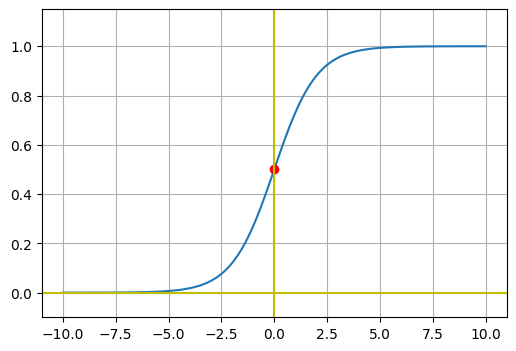

In [103]:
# Plot The sigmoid function
xs = np.linspace(-10, 10, num=100, dtype=np.float32)
activation = sigmoid(xs)

fig = plt.figure(figsize=(6,4))
plt.plot(xs, activation)
plt.plot(0,.5,'ro')

plt.grid(True, which='both')
plt.axhline(y=0, color='y')
plt.axvline(x=0, color='y')
plt.ylim([-0.1, 1.15])

## An Example with OR

##### OR Logic
A logic gate takes in two boolean (true/false or 1/0) inputs, and returns either a 0 or 1 depending on its rule. The truth table for a logic gate shows the outputs for each combination of inputs: (0, 0), (0, 1), (1,0), and (1, 1). For example, let's look at the truth table for an Or-gate:

<table>
<tr><th colspan="3">OR gate truth table</th></tr>
<tr><th colspan="2">Input</th><th>Output</th></tr>
<tr><td>0</td><td>0</td><td>0</td></tr>
<tr><td>0</td><td>1</td><td>1</td></tr>
<tr><td>1</td><td>0</td><td>1</td></tr>
<tr><td>1</td><td>1</td><td>1</td></tr>
</table>

##### OR as a Neuron

A neuron that uses the sigmoid activation function outputs a value between (0, 1). This naturally leads us to think about boolean values. Imagine a neuron that takes in two inputs, $x_1$ and $x_2$, and a bias term:

   <img src="https://drive.google.com/uc?id=1NO-XTgqd_xRWSAfbk2dCiZgirwrxqeMU" width=50% />

By limiting the inputs of $x_1$ and $x_2$ to be in $\left\{0, 1\right\}$, we can simulate the effect of logic gates with our neuron. The goal is to find the weights (represented by ? marks above), such that it returns an output close to 0 or 1 depending on the inputs.  What weights should we use to output the same results as OR? Remember: $\sigma(z)$ is close to 0 when $z$ is largely negative (around -10 or less), and is close to 1 when $z$ is largely positive (around +10 or greater).

$$
z = w_1 x_1 + w_2 x_2 + b
$$

Let's think this through:

* When $x_1$ and $x_2$ are both 0, the only value affecting $z$ is $b$. Because we want the result for input (0, 0) to be close to zero, $b$ should be negative (at least -10) to get the very left-hand part of the sigmoid.
* If either $x_1$ or $x_2$ is 1, we want the output to be close to 1. That means the weights associated with $x_1$ and $x_2$ should be enough to offset $b$ to the point of causing $z$ to be at least 10 (i.e., to the far right part of the sigmoid).

Let's give $b$ a value of -10. How big do we need $w_1$ and $w_2$ to be?  At least +20 will get us to +10 for just one of $\{w_1, w_2\}$ being on.

So let's try out $w_1=20$, $w_2=20$, and $b=-10$:

 <img src="https://drive.google.com/uc?id=1jtXlApzIKfOBDRlfa4h7bhCdr6rewv1e" width=50% />


##### Some Utility Functions
Since we're going to be making several example logic gates (from different sets of weights and biases), here are two helpers.  The first takes our weights and baises and turns them into a two-argument function that we can use like `and(a,b)`.  The second is for printing a truth table for a gate.

In [104]:
# Logic gate function
def logic_gate(w1, w2, b, x1, x2):
  ''' logic_gate is a function which returns the results of
        taking two args and  (hopefully) acts like a logic gate (and/or/not/etc.).
        its behavior is determined by w1,w2,b. '''
  return sigmoid(w1 * x1 + w2 * x2 + b)


In [105]:
# Test function that takes a function with two arguments
def test_gate(w1, w2, b):
  for x1 in range(2):
    for x2 in range(2):
      print("{}, {}: {}".format(x1, x2, np.round(logic_gate(w1, w2, b, x1, x2))))

Let's see how we did.  Here's the gold-standard truth table.

<table>
<tr><th colspan="3">OR gate truth table</th></tr>
<tr><th colspan="2">Input</th><th>Output</th></tr>
<tr><td>0</td><td>0</td><td>0</td></tr>
<tr><td>0</td><td>1</td><td>1</td></tr>
<tr><td>1</td><td>0</td><td>1</td></tr>
<tr><td>1</td><td>1</td><td>1</td></tr>
</table>

And our result:

In [106]:
or_gate = test_gate(20, 20, -10)

0, 0: 0.0
0, 1: 1.0
1, 0: 1.0
1, 1: 1.0


This matches - great!

# Exercise 1

##### Part 1:  AND Gate

Now you try finding the appropriate weight values for each truth table. Try not to guess and check. Think through it logically and try to derive values that work.

<table>
<tr><th colspan="3">AND gate truth table</th></tr>
<tr><th colspan="2">Input</th><th>Output</th></tr>
<tr><td>0</td><td>0</td><td>0</td></tr>
<tr><td>0</td><td>1</td><td>0</td></tr>
<tr><td>1</td><td>0</td><td>0</td></tr>
<tr><td>1</td><td>1</td><td>1</td></tr>
</table>

In [107]:
# Fill in the w1, w2, and b parameters such that the truth table matches
# and_gate = test_gate(...)
and_gate = test_gate(10, 10, -10)
      
      

0, 0: 0.0
0, 1: 0.0
1, 0: 0.0
1, 1: 1.0


##### Part 2: NOR (Not Or) Gate
<table>
<tr><th colspan="3">NOR gate truth table</th></tr>
<tr><th colspan="2">Input</th><th>Output</th></tr>
<tr><td>0</td><td>0</td><td>1</td></tr>
<tr><td>0</td><td>1</td><td>0</td></tr>
<tr><td>1</td><td>0</td><td>0</td></tr>
<tr><td>1</td><td>1</td><td>0</td></tr>
</table>
<table>

In [108]:
# Fill in the w1, w2, and b parameters such that the truth table matches
# nor_gate = test_gate(...)
nor_gate = test_gate(-20, -20, 10)

0, 0: 1.0
0, 1: 0.0
1, 0: 0.0
1, 1: 0.0


##### Part 3: NAND (Not And) Gate
<table>
<tr><th colspan="3">NAND gate truth table</th></tr>
<tr><th colspan="2">Input</th><th>Output</th></tr>
<tr><td>0</td><td>0</td><td>1</td></tr>
<tr><td>0</td><td>1</td><td>1</td></tr>
<tr><td>1</td><td>0</td><td>1</td></tr>
<tr><td>1</td><td>1</td><td>0</td></tr>
</table>

In [109]:
# Fill in the w1, w2, and b parameters such that the truth table matches
# nand_gate = test_gate(...)
nand_gate = test_gate(-10, -10, 15)


0, 0: 1.0
0, 1: 1.0
1, 0: 1.0
1, 1: 0.0


## Solutions 1

# Learning a Logic Gate

We can use TensorFlow to try and teach a model to learn the correct weights and bias by passing in our truth table as training data.

In [110]:
# Define LogicGate Model using tf.Module
class LogicGate(tf.Module):
    def __init__(self):
        super().__init__()
        self.built = False  # Track if model is initialized

    def __call__(self, x, train=True):
        # Initialize weights and bias on first call
        if not self.built:
            input_dim = x.shape[-1]  # Number of input features
            self.w = tf.Variable(tf.random.normal([input_dim, 1]), name="weights")
            self.b = tf.Variable(tf.zeros([1]), name="bias")
            self.built = True

        # Compute logits: z = Wx + b
        z = tf.add(tf.matmul(x, self.w), self.b)
        return tf.sigmoid(z)  # Apply sigmoid

# Loss function (Mean Squared Error)
def compute_loss(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

# Training function
def train_model(model, x_train, y_train, learning_rate=0.5, epochs=5000):
  # Iterate over the training data
  for epoch in range(epochs):
    with tf.GradientTape() as tape:
      y_pred = model(x_train)  # Forward pass
      loss = compute_loss(y_pred, y_train)

    # Update the parameters with respect to the gradient calculations
    grads = tape.gradient(loss, model.variables)
    for g,v in zip(grads, model.variables):
      v.assign_sub(learning_rate * g)

    # Print progress every 1000 epochs
    if epoch % 1000 == 0:
      acc = compute_accuracy(model, x_train, y_train)
      print(f"Epoch {epoch}, Loss: {loss.numpy():.4f}, Accuracy: {acc:.4f}")

# Accuracy function
def compute_accuracy(model, x, y_true):
    y_pred = model(x, train=False)
    y_pred_rounded = tf.round(y_pred)
    correct = tf.equal(y_pred_rounded, y_true)
    return tf.reduce_mean(tf.cast(correct, tf.float32)).numpy()


In [111]:

# Prepare AND gate dataset
and_table = np.array([[0, 0, 0],
                      [1, 0, 0],
                      [0, 1, 0],
                      [1, 1, 1]], dtype=np.float32)
x_train = and_table[:, :2]  # Inputs: x1, x2
y_train = and_table[:, 2:]  # Labels: y
# Initialize and train model
model_and = LogicGate()
train_model(model_and, x_train, y_train)
# Evaluate and print results
w1, w2 = model_and.w.numpy().flatten()
b = model_and.b.numpy().flatten()[0]
print(f"\nLearned weight for w1: {w1}")
print(f"Learned weight for w2: {w2}")
print(f"Learned bias: {b}\n")
# Test model predictions
y_pred = model_and(x_train, train=False).numpy().round().astype(np.uint8)
print("Predicted Truth Table:")
print(np.column_stack((and_table[:, :2], y_pred))) 


Epoch 0, Loss: 0.2974, Accuracy: 0.7500
Epoch 1000, Loss: 0.0121, Accuracy: 1.0000
Epoch 2000, Loss: 0.0056, Accuracy: 1.0000
Epoch 3000, Loss: 0.0036, Accuracy: 1.0000
Epoch 4000, Loss: 0.0026, Accuracy: 1.0000

Learned weight for w1: 5.741448402404785
Learned weight for w2: 5.741448402404785
Learned bias: -8.703777313232422

Predicted Truth Table:
[[0. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 1. 1.]]


# Limits of Single Neurons

If you've taken computer science courses, you may know that the XOR gates are the basis of computation. They can be used as half-adders, the foundation of being able to add numbers together. Here's the truth table for XOR:

##### XOR (Exclusive Or) Gate
<table>
<tr><th colspan="3">NAND gate truth table</th></tr>
<tr><th colspan="2">Input</th><th>Output</th></tr>
<tr><td>0</td><td>0</td><td>0</td></tr>
<tr><td>0</td><td>1</td><td>1</td></tr>
<tr><td>1</td><td>0</td><td>1</td></tr>
<tr><td>1</td><td>1</td><td>0</td></tr>
</table>

Now the question is, can you create a set of weights such that a single neuron can output this property?  It turns out that you cannot. Single neurons can't correlate inputs, so it's just confused. So individual neurons are out. Can we still use neurons to somehow form an XOR gate?

What if we tried something more complex:

 <img src="https://drive.google.com/uc?id=1eQde73kr-C_RVByjHehRd95jOnldTQHq" width=50% />

Here, we've got the inputs going to two separate gates: the top neuron is an OR gate, and the bottom is a NAND gate. The output of these gates is passed to another neuron, which is an AND gate. If you work out the outputs at each combination of input values, you'll see that this is an XOR gate!

XOR(A,B)=OR(A, B) AND NAND(A,B).

In [112]:

# Make sure you have or_gate, nand_gate, and and_gate working from above
#def xor_gate(a, b):
#    c = or_gate(a, b)
#    d = nand_gate(a, b)
#    return and_gate(c, d)
#test(xor_gate)



Thus, we can see how chaining together neurons can compose more complex models than we'd otherwise have access to.

# Exercise 2: Learning an XOR Gate

In [ ]:

# Define XOR Neural Network using tf.Module
class XOR_Network(tf.Module):
    def __init__(self):
        super().__init__()
        self.built = False  

    def __call__(self, x):
        
        if not self.built:
            input_dim = x.shape[-1] 

            self.W1 = tf.Variable(tf.random.normal([input_dim, 2]), name="W1")
            self.b1 = tf.Variable(tf.zeros([2]), name="b1")

            self.W2 = tf.Variable(tf.random.normal([2, 1]), name="W2")
            self.b2 = tf.Variable(tf.zeros([1]), name="b2")

            self.built = True
        hidden_layer = tf.sigmoid(tf.add(tf.matmul(x, self.W1), self.b1))  
        output = tf.sigmoid(tf.add(tf.matmul(hidden_layer, self.W2), self.b2))  

        return output

# Loss function 
def compute_loss(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

# Training function
def train_model(model, x_train, y_train, learning_rate=0.5, epochs=10000):
    optimizer = tf.optimizers.SGD(learning_rate=learning_rate)

    for epoch in range(epochs):
        with tf.GradientTape() as tape:
            y_pred = model(x_train)  
            loss = compute_loss(y_pred, y_train)

        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        # Print progress every 1000 epochs
        if epoch % 1000 == 0:
            acc = compute_accuracy(model, x_train, y_train)
            print(f"Epoch {epoch}, Loss: {loss.numpy():.4f}, Accuracy: {acc:.4f}")

# Accuracy function
def compute_accuracy(model, x, y_true):
    y_pred = model(x)  
    y_pred_rounded = tf.round(y_pred)
    correct = tf.equal(y_pred_rounded, y_true)
    return tf.reduce_mean(tf.cast(correct, tf.float32)).numpy()


In [ ]:
# XOR Dataset 
xor_table = np.array([[0, 0, 0],
                      [1, 0, 1],
                      [0, 1, 1],
                      [1, 1, 0]], dtype=np.float32)

x_train = xor_table[:, :2]  
y_train = xor_table[:, 2:] 

# Initialize XOR train model
xor_model = XOR_Network()
train_model(xor_model, x_train, y_train)

w1_vals = xor_model.W1.numpy()
w2_vals = xor_model.W2.numpy()
b1_vals = xor_model.b1.numpy()
b2_vals = xor_model.b2.numpy()
print(f"\nLearned weights for W1:\n{w1_vals}")
print(f"Learned biases for b1:\n{b1_vals}")
print(f"Learned weights for W2:\n{w2_vals}")
print(f"Learned bias for b2:\n{b2_vals}\n")

# Test model predictions
y_pred = xor_model(x_train).numpy().round().astype(np.uint8)
out_table = np.column_stack((xor_table[:, :2], y_pred))

print("Predicted Truth Table:")
print(out_table)




Epoch 0, Loss: 0.2506, Accuracy: 0.5000
Epoch 1000, Loss: 0.1572, Accuracy: 0.7500
Epoch 2000, Loss: 0.0088, Accuracy: 1.0000
Epoch 3000, Loss: 0.0036, Accuracy: 1.0000
Epoch 4000, Loss: 0.0022, Accuracy: 1.0000
Epoch 5000, Loss: 0.0016, Accuracy: 1.0000
Epoch 6000, Loss: 0.0012, Accuracy: 1.0000
Epoch 7000, Loss: 0.0010, Accuracy: 1.0000
Epoch 8000, Loss: 0.0008, Accuracy: 1.0000
Epoch 9000, Loss: 0.0007, Accuracy: 1.0000

Learned weights for W1:
[[-6.0877776 -5.415485 ]
 [ 6.217679   5.2264075]]
Learned biases for b1:
[ 3.092974  -2.8365765]
Learned weights for W2:
[[-8.439832]
 [ 8.971553]]
Learned bias for b2:
[3.9260025]

Predicted Truth Table:
[[0. 0. 0.]
 [1. 0. 1.]
 [0. 1. 1.]
 [1. 1. 0.]]
